In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MyLogisticRegression import myLogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


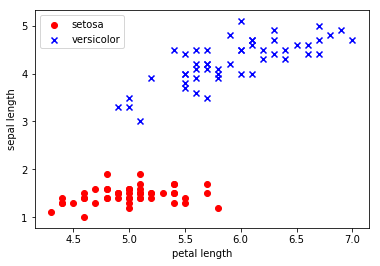

In [3]:
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0],X[:50,1], color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1], color='blue',marker='x',label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [4]:
y[y==-1] = 0
lr = myLogisticRegression(eta=0.01, n_iter=500).fit(X, y)
y_pred = lr.predict(X)
print("miss classify count: %d" % (y!=y_pred).sum())

In [14]:
print(lr.w_)

[ 1.02207976  0.38994839 -1.17934052]


## sklearn 中的逻辑回归

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#对训练集和测试集的特征进行缩放
sc = StandardScaler()
sc.fit(X_train) #学习参数，也就是计算出样本均值和标准差fit
X_train_std = sc.transform(X_train) #使用前面计算得到的均值和标准差进行处理transform
X_test_std = sc.transform(X_test)

In [ ]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train) #学习参数
lr.predict_proba(X_test_std[0,:])

In [ ]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
print(weights)
print(params)

In [ ]:
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('c')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## 使用Logistic Regression来进行多分类处理

In [2]:
import scipy.io as spio

In [3]:
data = spio.loadmat('data/data_digits.mat')

In [4]:
X = data['X']
y = data['y']

In [5]:
#获取X数据，每一行对应一个数字20x20px
X[:10]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [7]:
m,n = X.shape
rand_indices = [t for t in [np.random.randint(x-x, m) for x in range(100)]] # 生成100个0-m的随机数

In [8]:
def display_data(imgData):
    sum = 0
    '''
    显示100个数（若是一个一个绘制将会非常慢，可以将要画的数字整理好，放到一个矩阵中，显示这个矩阵即可）
    - 初始化一个二维数组
    - 将每行的数据调整成图像的矩阵，放进二维数组
    - 显示即可
    '''
    pad = 1
    display_array = -np.ones((pad+10*(20+pad),pad+10*(20+pad)))
    for i in range(10):
        for j in range(10):
            display_array[pad+i*(20+pad):pad+i*(20+pad)+20,pad+j*(20+pad):pad+j*(20+pad)+20] = (imgData[sum,:].reshape(20,20,order="F"))    # order=F指定以列优先，在matlab中是这样的，python中需要指定，默认以行
            sum += 1
            
    plt.imshow(display_array,cmap='gray')   #显示灰度图像
    plt.axis('off')
    plt.show()

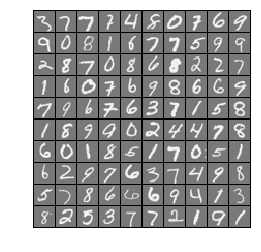

In [9]:
display_data(X[rand_indices,:])

In [10]:
lr_ovr = myLogisticRegression(eta=0.01, n_iter=500).fit_OvR(X, y)

In [11]:
y_pred = lr_ovr.predict_proba_OvR(X)

In [12]:
print(y_pred)

[[ 0.          0.75026079]
 [ 0.          0.69387207]
 [ 0.          0.07511666]
 ..., 
 [ 9.          0.28807861]
 [ 9.          0.15570958]
 [ 0.          0.19018552]]


In [13]:
y_pred = y_pred[:,0]

In [14]:
print(y_pred)

[ 0.  0.  0. ...,  9.  9.  0.]


In [15]:
print u"预测准确度为：%f%%"%np.mean(np.float64(y_pred == y.reshape(1,-1))*100)

预测准确度为：82.320000%
